In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hemis = ['lh','rh']
measures = ['thickness','volume']

df = dict()
#Currently set for hemi = right hemisphere, meas= thickness

for meas in measures:

    df_list = list()

    for hemi in hemis:
        
        print(f'hemi={hemi}, meas={meas}')
        
        tsv_file=f'tsv/aparc_hemi-{hemi}_measure-{meas}_table.tsv'
        
        #when we read the table, we want the subject id to be the index.. 
        #this is a column that is labelled as {hemi}.aparc.{meas}
        #  so we can use the index_col option when reading the table.
        #  then we do a rename operation to make it a consistent name, like subject_id
        label_names = pd.read_table(tsv_file).columns[1:35]                
        
        
        df_list.append(
                pd.read_table(tsv_file)
                .rename(columns={f'{hemi}.aparc.{meas}':'subject_id'})
                .melt(id_vars=['subject_id'],value_vars=label_names, var_name='label',value_name=meas)
                .assign(hemi=lambda x: hemi)
                .assign(group=lambda x: x.subject_id.str[4:6]))
        
    df[meas] = pd.concat(df_list).reset_index()
#Code for getting measure specific data
        #df["thickness"]

hemi=lh, meas=thickness
hemi=rh, meas=thickness
hemi=lh, meas=volume
hemi=rh, meas=volume


In [4]:
#Lists
hemis = ['lh','rh']
measures = ['thickness','volume']

#tsv_file=f'/Users/kezamotlana/Documents/Western University/Codes and Data/Data Set/tsv/aparc_hemi-{hemis}_measure-{measures}_table.tsv'


df = dict()
#Currently set for hemi = right hemisphere, meas= thickness

for meas in measures:

    df_list = list()

    for hemi in hemis:
        
        #print(f'hemi={hemi}, meas={meas}')
        
        tsv_file=f'tsv/aparc_hemi-{hemi}_measure-{meas}_table.tsv'

        #when we read the table, we want the subject id to be the index.. 
        #this is a column that is labelled as {hemi}.aparc.{meas}
        #  so we can use the index_col option when reading the table.
        #  then we do a rename operation to make it a consistent name, like subject_id
        label_names = pd.read_table(tsv_file).columns[1:35]                
        
        df_list.append(
                pd.read_table(tsv_file)
                .rename(columns={f'{hemi}.aparc.{meas}':'subject_id'})
                .melt(id_vars=['subject_id'],value_vars=label_names, var_name='label',value_name=meas)
                .assign(hemi=lambda x: hemi)
                .assign(group=lambda x: x.subject_id.str[4:6]))
    
    df[meas] = pd.concat(df_list).reset_index()

thickness_data = df['thickness']
test = thickness_data[thickness_data.hemi=='rh'][thickness_data.label=='caudalmiddlefrontal'][thickness_data.group=='SZ'].thickness
#print(test)

<ipython-input-4-1a07caa11eb0>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = thickness_data[thickness_data.hemi=='rh'][thickness_data.label=='caudalmiddlefrontal'][thickness_data.group=='SZ'].thickness


In [48]:
#THICKNESS DATA
#print("Healthy controls average of " + hemi + " " + label)
    
hemis=['lh','rh']
metrics=['thickness','volume']
significant_LH=[]
significant_RH=[]

total_rh_control_data={}
total_lh_control_data={}

total_rh_patient_data={}
total_lh_patient_data={}

average_of_RH_controls_data={}
average_of_LH_controls_data={}

average_of_RH_patients_data={}
average_of_LH_patients_data={}

RH_stat_analysis={}
LH_stat_analysis={}


In [50]:
#THICKNESS DATA
#print("Healthy controls average of " + hemi + " " + label)
    
hemis=['lh','rh']
metrics=['thickness','volume']

    #loop over regions
for label in label_names:
    df_ = df['thickness']
    #print(label)
    RH_controls_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    LH_controls_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    RH_patients_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()
    LH_patients_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()

    total_rh_control_data[label]=RH_controls_data
    total_lh_control_data[label]=LH_controls_data
    
    total_rh_patient_data[label]=RH_patients_data
    total_lh_patient_data[label]=LH_patients_data

    
 #HC subjects average per label
    average_of_RH_controls_data[label]=np.average(total_rh_control_data[label])
    average_of_LH_controls_data[label]=np.average(total_lh_control_data[label])
            
#SZ subjects average per label
    average_of_RH_patients_data[label]=np.average(total_rh_patient_data[label])
    average_of_LH_patients_data[label]=np.average(total_lh_patient_data[label])
      
##T-test
    RH_stat_analysis[label]=scipy.stats.ttest_ind(total_rh_control_data[label], total_rh_patient_data[label])
    
##Ttest LH
    LH_stat_analysis[label]=scipy.stats.ttest_ind(total_lh_control_data[label], total_lh_patient_data[label])
    

<ipython-input-50-62c628460f08>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_controls_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
<ipython-input-50-62c628460f08>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_controls_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
<ipython-input-50-62c628460f08>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_patients_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()
<ipython-input-50-62c628460f08>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_patients_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()


In [52]:
for label in label_names:
    print("    ")                       
    print ("Average Thickness of Healthy Controls' RH " + " " + label + " = " + str(average_of_RH_controls_data[label]))
    print ("Average Thickness of Healthy Controls' LH " + " " + label + " = " + str(average_of_LH_controls_data[label]))
    print("    ")
    print ("Average Thickness of Patients' RH " + " " + label + " = " + str(average_of_RH_patients_data[label]))
    print ("Average Thickness of Patients' LH " + " " + label + " = " + str(average_of_LH_patients_data[label]))
    print("    ")
    print("Right hemisphere T-test = " + str(RH_stat_analysis[label]))
    print("Left Hemisphere T-test = " + str(LH_stat_analysis[label]))
    if LH_stat_analysis[label].pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Left Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        #LH_stat_analysis[label].append(label + " " + str(LH_stat_analysis[label].pvalue))
    
    if RH_stat_analysis[label].pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Right Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        #significant_RH_thickness.append(label + " " + str(RH_thickness.pvalue))
    print("    ")
    print("_______________________________________________________________________")
    

    
Average Thickness of Healthy Controls' RH  bankssts = 2.4551176470588234
Average Thickness of Healthy Controls' LH  bankssts = 2.3154117647058823
    
Average Thickness of Patients' RH  bankssts = 2.4895
Average Thickness of Patients' LH  bankssts = 2.3995
    
Right hemisphere T-test = Ttest_indResult(statistic=-0.5270139960984838, pvalue=0.6019352366471747)
Left Hemisphere T-test = Ttest_indResult(statistic=-1.254776686524679, pvalue=0.21893773471593167)
    
_______________________________________________________________________
    
Average Thickness of Healthy Controls' RH  caudalanteriorcingulate = 2.219941176470588
Average Thickness of Healthy Controls' LH  caudalanteriorcingulate = 2.41035294117647
    
Average Thickness of Patients' RH  caudalanteriorcingulate = 2.2685
Average Thickness of Patients' LH  caudalanteriorcingulate = 2.5133125
    
Right hemisphere T-test = Ttest_indResult(statistic=-0.642366616368212, pvalue=0.525357711602037)
Left Hemisphere T-test = Ttest_i

In [64]:
####Compiled data of RIGHT hemisphere
RH_data_dict={}
testtest={}
for label in label_names: 
    testtest={}
    controls=average_of_RH_controls_data[label]
    patients=average_of_RH_patients_data[label]
    testtest['HC']=controls
    testtest['SZ']=patients
    RH_data_dict[label]=testtest
#print(RH_data_dict)
#print(RH_data_dict)

total_RH_data=pd.DataFrame.from_dict(RH_data_dict, orient='index')
index_name=total_RH_data.index.name
total_RH_data.index.name='Right Hemisphere Regions'
#print(total_RH_data)



#print("________________________")

####Compiled data of LEFT hemisphere
LH_data_dict={}
testtT={}
for label in label_names: 
    testtT={}
    LH_controls=average_of_LH_controls_data[label]
    LH_patients=average_of_LH_patients_data[label]
    testtT['HC']=LH_controls
    testtT['SZ']=LH_patients
    LH_data_dict[label]=testtT
#print(LH_data_dict)
#print(RH_data_dict)

total_LH_data=pd.DataFrame.from_dict(LH_data_dict, orient='index')
index_name=total_LH_data.index.name
total_LH_data.index.name='Left Hemisphere Regions'
#print(total_LH_data)

In [62]:
total_LH_data.plot.bar()
total_LH_data.plot.bar()

AttributeError: 'dict' object has no attribute 'plot'

In [57]:
#print(RH_control_data_display_dict.keys())
labelss=list(RH_control_data_display_dict.keys())
valuess=list(RH_control_data_display_dict.values())


#print(labelss)
test= RH_control_data_display_dict['bankssts']
plt.show(test)
#df_[df.hemi=='rh'][df_.label==label][df.group=='HC'].thickness.to_numpy()

NameError: name 'RH_control_data_display_dict' is not defined

TypeError: unhashable type: 'list'

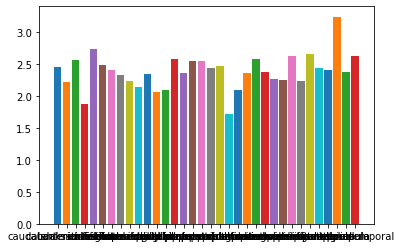

In [113]:
#, x='RH_control_data_display_dict.keys()', y='RH_control_data_display_dict.values()')
#Does not work = sns.barplot(data=RH_control_data_display_dict, x=labelss, y=valuess)
#Works: plt.bar(labelss, valuess)

for testplot in labelss: 
    plt.bar(testplot, RH_control_data_display_dict[testplot])
    

sns.barplot(data=RH_control_data_display_dict, x=labelss, y=valuess, hue="sex")